# Gradient based methods for machine learning 

\begin{exercise}
Apply the following gradient based algorithms to estimate the minimum of the function 

    def Rosen(x,a=10):
        return (1-x[0])**2 + a*(x[1]-x[0]**2)**2
    def dRosen(x,a=10):
        return np.array([-2.0*(1.0-x[0]) - 2.0*a*(x[1]-x[0]**2)*2.0*x[0],2.0*a*(x[1]-x[0]**2)])
by following the example below. Given the same starting point evaluate the methods in terms of the number of iterations they take to compute an estimate to the minimum. Study the book "optimization for machine learning"
\end{exercise}


\begin{exercise}
Solve the least squares problem with quadratic polynomials given in online lab3 by applying the following gradient based methods and evaluate them with respect to accuracy achieved and the number of iterations required to achieve this accuracy. 

\end{exercise}


# Example of finding the minimum of a function with the gradient based methods introduced in class

In [1]:
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from itertools import zip_longest

\begin{example}
Find the minimum of $f(x,y) = x^2 + 10y^2$

\end{example}


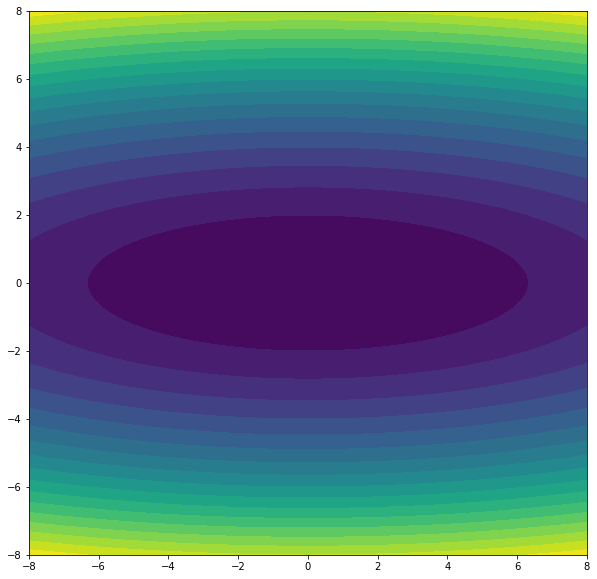

In [2]:
# plots the function
xi = np.linspace(-8, 8, 1000)
yi = np.linspace(-8, 8, 1000)
X,Y = np.meshgrid(xi, yi)
Z = X * X + 10 * Y * Y

def contour(X,Y,Z, arr = None):
    plt.figure(figsize=(10, 10))
    xx = X.flatten()
    yy = Y.flatten()
    zz = Z.flatten()
    plt.contourf(X, Y, Z, 20, cmap=plt.get_cmap('viridis'))
    if arr is not None:
        arr = np.array(arr)
        for i in range(len(arr) - 1):
            plt.xlim(-8, 8)
            plt.ylim(-8, 8)
            plt.plot(arr[i:i+2,0],arr[i:i+2,1], color='white')
        
contour(X,Y,Z)


In [3]:
# defines the function and its gradient
def f(x):
    return x[0]*x[0] + 10.*x[1]*x[1]
x0=[7,6]
f(x0)
def gradient(x):
    return np.array([2*x[0],20*x[1]])
gradient(x0)

array([ 14, 120])

# Read the block describing the following gradient based methods

https://tiddler.github.io/optimizers/

In [4]:
def gd(x_start, step, gradient, iteration=50):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    for _ in range(iteration):
        grad = gradient(x)
        x -= grad * step
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot


In [5]:
x_start = [7,6]
step = 0.02
out = gd(x_start, step, gradient, iteration=1000)

print(out[0],f(out[0]),gradient(out[0]))

[4.62325045e-07 8.49977943e-90] 2.137444476588915e-13 [9.24650091e-07 1.69995589e-88]


In [6]:
def momentum(x_start, step, g, discount=0.7, iteration=50):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for _ in range(iteration):
        grad = g(x)
        pre_grad = pre_grad * discount + grad
        x -= pre_grad * step
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot


In [7]:
x_start = [7,6]
step = 0.02
out = momentum(x_start, step, gradient, discount=0.7, iteration=100)

print(out[0],f(out[0]),gradient(out[0]))

[-3.83577479e-07  3.91212545e-07] 1.6776042363479544e-12 [-7.67154959e-07  7.82425090e-06]


In [8]:
def nesterov(x_start, step, gradient, discount=0.7, iteration=50):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for _ in range(iteration):
        x_future = x - step * discount * pre_grad
        grad = gradient(x_future)
        pre_grad = pre_grad * 0.7 + grad 
        x -= pre_grad * step
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot


In [9]:
x_start = [7,6]
step = 0.02
out = nesterov(x_start, step, gradient, discount=0.7, iteration=100)

print(out[0],f(out[0]),gradient(out[0]))

[4.77156097e-07 5.79891898e-16] 2.276779404442269e-13 [9.54312193e-07 1.15978380e-14]


In [10]:
def adagrad(x_start, step, gradient, delta=1e-8, iteration=50):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    sum_grad = np.zeros_like(x)
    for _ in range(iteration):
        grad = gradient(x)
        sum_grad += grad * grad
        x -= step * grad / (np.sqrt(sum_grad) + delta)
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot


In [11]:
x_start = [7,6]
step = 5
out = adagrad(x_start, step, gradient, delta=1e-8, iteration=50)

print(out[0],f(out[0]),gradient(out[0]))

[6.19602115e-08 5.87289965e-12] 3.83906815009237e-15 [1.23920423e-07 1.17457993e-10]


In [12]:
def adadelta(x_start, step, gradient, momentum=0.9, delta=1e-1, iteration=50):
    x = np.array(x_start, dtype='float64')
    sum_grad = np.zeros_like(x)
    sum_diff = np.zeros_like(x)
    passing_dot = [x.copy()]
    for _ in range(iteration):
        grad = gradient(x)
        sum_grad = momentum * sum_grad + (1 - momentum) * grad * grad
        diff = np.sqrt((sum_diff + delta) / (sum_grad + delta)) * grad
        x -= step * diff
        sum_diff = momentum * sum_diff + (1 - momentum) * (diff * diff)
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot


In [13]:
x_start = [7,6]
step = 2
out = adadelta(x_start, step, gradient, momentum=0.9, delta=1e-1, iteration=50)

print(out[0],f(out[0]),gradient(out[0]))

[8.17010809e-08 1.41402616e-11] 6.675068624999616e-15 [1.63402162e-07 2.82805233e-10]


In [14]:
def rmsprop(x_start, step, gradient, rms_decay=0.9, delta=1e-8, iteration=50):
    x = np.array(x_start, dtype='float64')
    sum_grad = np.zeros_like(x)
    passing_dot = [x.copy()]
    for _ in range(iteration):
        grad = gradient(x)
        sum_grad = rms_decay * sum_grad + (1 - rms_decay) * grad * grad
        x -= step * grad / (np.sqrt(sum_grad) + delta)
        passing_dot.append(x.copy())        
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot


In [15]:
x_start = [7,6]
step = 1
out = rmsprop(x_start, step, gradient, rms_decay=0.9, delta=1e-8, iteration=50)

print(out[0],f(out[0]),gradient(out[0]))

[5.06021772e-09 5.02010143e-14] 2.560580341366388e-17 [1.01204354e-08 1.00402029e-12]


In [20]:
# gradient descent algorithm with adam
def adam(objective, derivative, x_start, n_iter, alpha, beta1, beta2, eps=1e-8):
    # generate an initial point
    x = np.array(x_start, dtype='float64')
    #x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x)
    # initialize first and second moments
    m = [0.0 for _ in range(x.shape[0])]
    v = [0.0 for _ in range(x.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x)
        # build a solution one variable at a time
        for i in range(x.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        # evaluate candidate point
        score = objective(x)
        # report progress
        #print('>%d f(%s) = %.5f' % (t, x, score))
    return [x, score]

In [27]:
from numpy import asarray
from numpy import arange
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
...
# seed the pseudo random number generator

# define range for input
#bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
x_start = [7,6]
# define the total iterations
n_iter = 100
# steps size
alpha = 2
# factor for average gradient
beta1 = 0.88
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
best, score = adam(f, gradient, x_start, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f' % (best, score))

Done!
f([ 0.00567462 -0.00184567]) = 0.000066
